# Лабораторна робота №2
# Використання Pandas для аналізу даних

Виконав: студент групи КН-221в ШУЛЮПОВ Єгор <br>
Перевірив: асистент кафедри ЗВЄРЦЕВ Герман Олександрович

Мета: Вивчення основних функцій Pandas для аналізу даних.

Завдання:

Завантажте набір даних про дитячі імена США з веб-сайту kaggle.com (https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv)
Виконайте вправи по варіантах. Для розрахунку номеру варіанту скористуватися формулою. N = (n + 4 ) % 5 + 1 , де N – номер варіанту, n – номер у списку групи.

In [2]:
N = (29 + 4) % 5 + 1
print(N)

4


| Варіант | Номери вправ                                        |
|---------|-----------------------------------------------------|
|  4     | 1, 3, 6, 7, 8, 12, 13, 14, 15, 16, 17, 19, 20, 22, 24, 25, 26, 27 | |

# Завдання 1 Виведіть перші 8 рядків набору даних.

In [4]:
import pandas as pd

file_path = "NationalNames.csv"
df = pd.read_csv(file_path)

df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


# Завдання 3 Отримайте імена стовпців набору даних

In [5]:
import pandas as pd

file_path = 'NationalNames.csv'

data = pd.read_csv(file_path)

column_names = data.columns

print(column_names)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


# 6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних

In [6]:
import pandas as pd

file_path = "NationalNames.csv"  
df = pd.read_csv(file_path)

unique_names_by_gender = df.groupby('Gender')['Name'].nunique().reset_index()
unique_names_by_gender = unique_names_by_gender.rename(columns={'Name': 'Name'})
unique_names_by_gender

,Gender,Name
0,F,64911
1,M,39199


# 7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році

In [7]:
import pandas as pd

file_path = "NationalNames.csv" 
df = pd.read_csv(file_path)

male_names_2010 = df[(df['Year'] == 2010) & (df['Gender'] == 'M')]

sorted_male_names_2010 = male_names_2010.sort_values(by='Count', ascending=False)

top_5_male_names_2010 = sorted_male_names_2010.head(5)
top_5_male_names_2010[['Name', 'Count']]

,Name,Count
1677392,Jacob,22082
1677393,Ethan,17985
1677394,Michael,17308
1677395,Jayden,17152
1677396,William,17030


# 8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)

In [2]:
import pandas as pd

file_path = "NationalNames.csv" 
df = pd.read_csv(file_path)

year = 1947

names_for_year = df[df['Year'] == year]

most_popular_name = names_for_year[names_for_year['Count'] == names_for_year['Count'].max()]['Name'].values[0]

print(f"Найпопулярніше ім'я у {year} році: {most_popular_name}")

Найпопулярніше ім'я у 1947 році: Linda


# Завдання 12 Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році))

In [10]:
import pandas as pd

file_path = "NationalNames.csv"
df = pd.read_csv(file_path)

unique_names_by_year = df.groupby('Year')['Name'].nunique()

year_most_unique_names = unique_names_by_year.idxmax()

names_for_year = df[df['Year'] == year_most_unique_names]

most_popular_name = names_for_year[names_for_year['Count'] == names_for_year['Count'].max()]['Name'].values[0]

print(f"Найпопулярніше ім'я у {year_most_unique_names} році: {most_popular_name}")

Найпопулярніше ім'я у 2008 році: Jacob


# Завдання 13 Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих іменн

In [11]:
import pandas as pd

file_path = 'NationalNames.csv'

data = pd.read_csv(file_path)

jacob_female = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]

most_popular_year = jacob_female[jacob_female['Count'] == jacob_female['Count'].max()]

most_popular_year

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


# Завдання 14 Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена))

In [12]:
import pandas as pd

file_path = 'NationalNames.csv'

data = pd.read_csv(file_path)

pivot_table = data.pivot_table(index=['Year', 'Name'], values='Gender', aggfunc='nunique')

most_neutral_year = pivot_table.groupby('Year').sum()['Gender'].idxmax()

most_neutral_year

2008

# Завдання 15 Знайдіть загальну кількість народжень за рік.

In [14]:
import pandas as pd

file_path = 'NationalNames.csv'

data = pd.read_csv(file_path)

total_births_by_year = data.groupby('Year')['Count'].sum().reset_index()

total_births_by_year.head(5)

,Year,Count
0,1880,201484
1,1881,192699
2,1882,221538
3,1883,216950
4,1884,243467


# Завдання 16 Знайдіть рік, коли народилося найбільше дітей

In [15]:
import pandas as pd

file_path = 'NationalNames.csv'

data = pd.read_csv(file_path)

total_births_by_year = data.groupby('Year')['Count'].sum()

year_with_most_births = total_births_by_year.idxmax()

print(f"Рік, коли народилося найбільше дітей: {year_with_most_births}")

Рік, коли народилося найбільше дітей: 1957


# Завдання 17 Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [6]:
import pandas as pd

file_path = 'NationalNames.csv'

data = pd.read_csv(file_path)

births_by_gender_by_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()

births_by_gender_by_year.head(5)

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


# 19. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

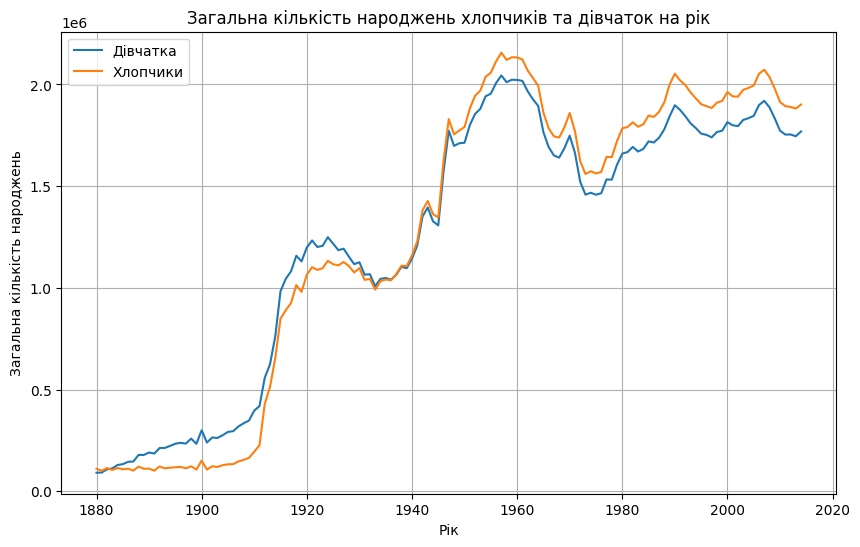

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("NationalNames.csv") 

grouped = data.groupby(['Year', 'Gender']).sum()

boys_data = grouped.loc[(slice(None), 'M'), 'Count']
girls_data = grouped.loc[(slice(None), 'F'), 'Count']

boys_data = boys_data.reset_index()
girls_data = girls_data.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(girls_data['Year'], girls_data['Count'], label='Дівчатка')
plt.plot(boys_data['Year'], boys_data['Count'], label='Хлопчики')

plt.xlabel('Рік')
plt.ylabel('Загальна кількість народжень')
plt.title('Загальна кількість народжень хлопчиків та дівчаток на рік')
plt.legend()
plt.grid(True)

plt.show()

# 20. Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців)

In [19]:
import pandas as pd

file_path = "NationalNames.csv" 
df = pd.read_csv(file_path)

name_gender_counts = df.groupby('Name')['Gender'].nunique()

gender_neutral_names = name_gender_counts[name_gender_counts == 2]

count_gender_neutral_names = len(gender_neutral_names)

print(f"Кількість гендерно нейтральних імен: {count_gender_neutral_names}")

Кількість гендерно нейтральних імен: 10221


# Завдання 22 Підрахуйте скільки років проводилось спостереження

In [20]:
import pandas as pd

file_path = 'NationalNames.csv'

data = pd.read_csv(file_path)

min_year = data['Year'].min()
max_year = data['Year'].max()

years_observed = max_year - min_year + 1

print(f"Спостереження проводились: {years_observed} років")

Спостереження проводились: 135 років


# Завдання 24 Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів )

In [28]:
import pandas as pd

file_path = 'NationalNames.csv'

data = pd.read_csv(file_path)

average_count = data['Count'].mean()

print(f"середня частота використання {average_count}")

unpopular_names = data[data['Count'] < average_count]

most_popular_unpopular_name = unpopular_names[unpopular_names['Count'] == unpopular_names['Count'].max()]

print(f"Найпопулярніше серед непопулярних імен - {most_popular_unpopular_name['Name'].values[0]}. Ним називали {most_popular_unpopular_name['Count'].values[0]} разів")

середня частота використання 184.68792116719703
Найпопулярніше серед непопулярних імен - Allen. Ним називали 184 разів


# 25. Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.

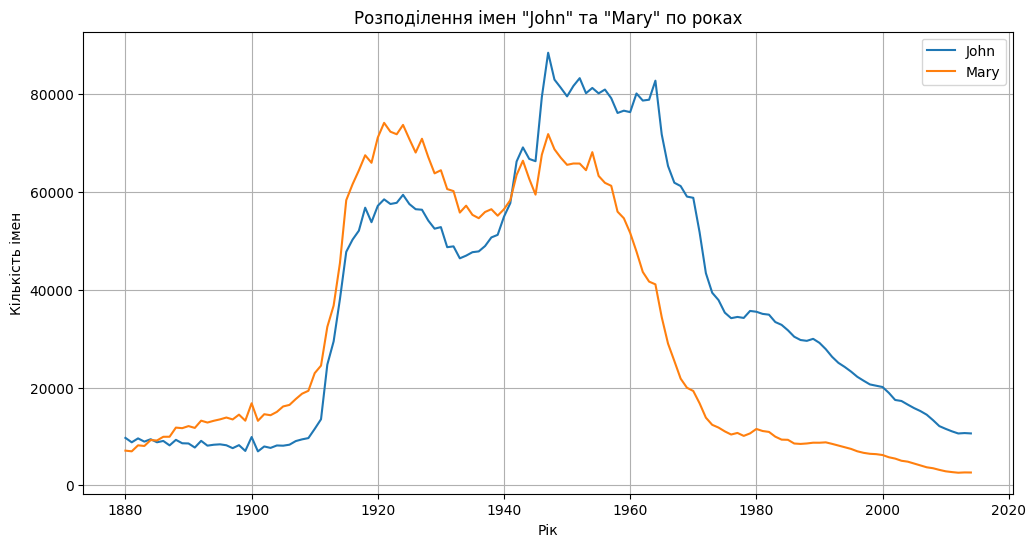

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NationalNames.csv')

john_data = df[df['Name'] == 'John']
mary_data = df[df['Name'] == 'Mary']

john_name_counts = john_data.groupby('Year')['Count'].sum()
mary_name_counts = mary_data.groupby('Year')['Count'].sum()

plt.figure(figsize=(12, 6))
plt.plot(john_name_counts.index, john_name_counts, linestyle='-', label='John')
plt.plot(mary_name_counts.index, mary_name_counts, linestyle='-', label='Mary')
plt.xlabel('Рік')
plt.ylabel('Кількість імен')
plt.title('Розподілення імен "John" та "Mary" по роках')
plt.grid(True)
plt.legend()

plt.show()

# Завдання 26 Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.

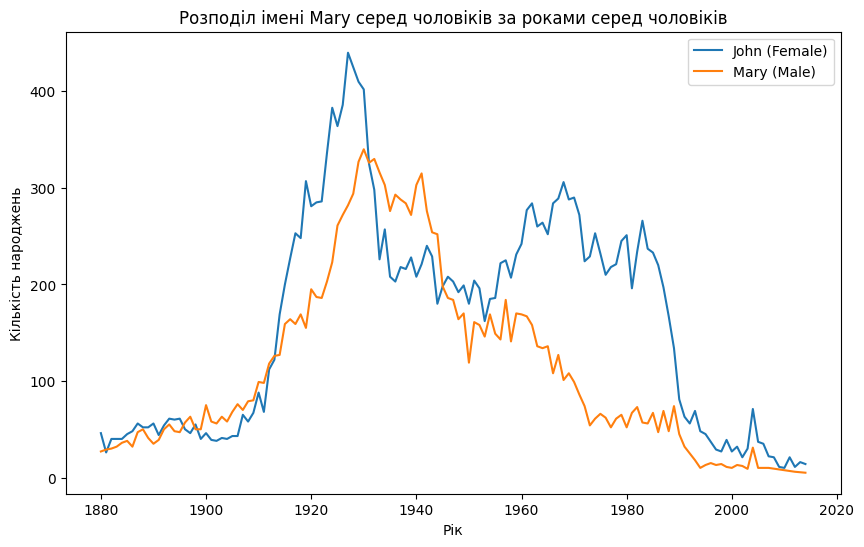

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'NationalNames.csv'

data = pd.read_csv(file_path)

john_female = data[(data['Name'] == 'John') & (data['Gender'] == 'F')]

mary_male = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')]

plt.figure(figsize=(10, 6))
plt.plot(john_female['Year'], john_female['Count'], label='John (Female)')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.title('Розподіл імені John серед жінок за роками серед жінок')
plt.legend()

plt.plot(mary_male['Year'], mary_male['Count'], label='Mary (Male)')
plt.title('Розподіл імені Mary серед чоловіків за роками серед чоловіків')
plt.legend()

plt.show()

# 27. Знайти найпопулярніші імена в кожному році.

In [24]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

most_popular_names = df.groupby('Year')[['Name', 'Count']].apply(lambda x: x.loc[x['Count'].idxmax()])

most_popular_names

,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267
